In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
# Listas

mylist = [ 3.15,2.35,6.89,4.52,3.32 ]
print(mylist)

[3.15, 2.35, 6.89, 4.52, 3.32]


In [7]:
print(mylist[1], mylist[-1], mylist[-3], mylist[:])

(2.35, 3.32, 6.89, [3.15, 2.35, 6.89, 4.52, 3.32])


In [9]:
print(mylist[0:2], mylist[:2])

([3.15, 2.35], [3.15, 2.35])


In [11]:
print(mylist[2:])

[6.89, 4.52, 3.32]


In [12]:
mylist.insert(2, 5.963)
print(mylist)

[3.15, 2.35, 5.963, 6.89, 4.52, 3.32]


In [16]:
mylist.index(2.35)
mylist.append(6.98)

In [17]:
print(mylist)

[3.15, 2.35, 5.963, 6.89, 4.52, 3.32, 6.98]


In [23]:
# Lectura de datos
file_1 = 'data/lectura1.dat'
data = np.loadtxt(file_1, comments='#')
print(data)

[[  1.    1.    0.9]
 [  2.    2.2   7.8]
 [  3.    2.5  27.5]
 [  4.    4.4  67. ]
 [  5.    6.  130. ]]


In [27]:
tiempo = data[:,0]
x = data[:,1]
y = data[:,2]
print(tiempo,x,y)

(array([1., 2., 3., 4., 5.]), array([1. , 2.2, 2.5, 4.4, 6. ]), array([  0.9,   7.8,  27.5,  67. , 130. ]))


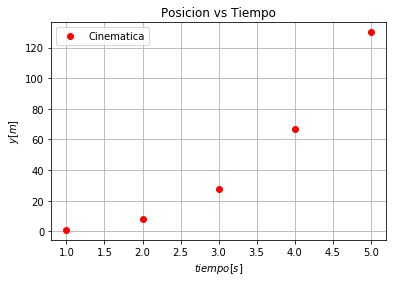

In [33]:
# Plotting

plt.plot(tiempo,y,'ro',label='Cinematica')

plt.title('Posicion vs Tiempo')
plt.xlabel(r'$tiempo[s]$')
plt.ylabel(r'$y[m]$')
plt.grid()
plt.legend()

plt.savefig('Figures/Yvst.pdf')
plt.show()

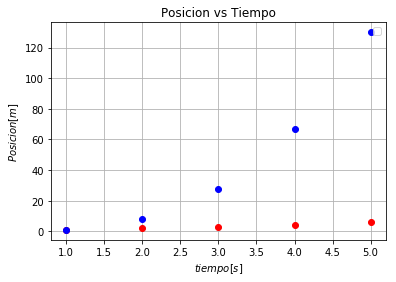

In [35]:
fig, ax = plt.subplots()
p1 = ax.plot(tiempo, x, 'ro')
p2 = ax.plot(tiempo, y, 'bo')

ax.set(xlabel = r'$tiempo[s]$', ylabel = r'$Posicion[m]$', title='Posicion vs Tiempo')

ax.grid()
ax.legend()

plt.savefig('Figures/XYvst.pdf')
plt.show()

In [36]:
def Funcion(t, N0_, alpha_):
    return N0_*np.exp(-t*alpha_)

# Nuclear Decay

$$ N(t) = N_{0}e^{-\alpha t}  $$

In [40]:
N0 = 1000.
alpha = 0.8

# la variable independiente
t = np.linspace(0.1,2.,100)
#print(t)

In [46]:
y = np.zeros(len(t))
#print(y)

#Llenado usando c++

#for i in range(len(t)):
#    y[i] = Funcion(t[i], N0, alpha)

# Llenado tipo python

y = Funcion(t,N0,alpha)

#print(y)

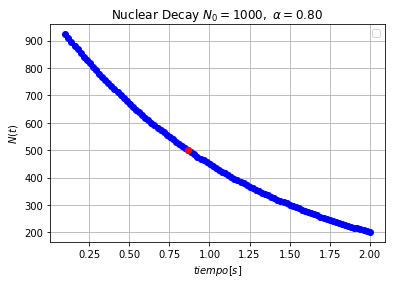

In [53]:
fig, ax = plt.subplots()
p1 = ax.plot(t, y, 'bo')
p2 = ax.plot(np.log(2)/alpha, 0.5*N0, 'ro')

ax.set(xlabel = r'$tiempo[s]$', ylabel = r'$N(t)$', title=r'$\mathrm{Nuclear \ Decay} \ N_{0}=%.0f, \ \alpha = %.2f$' %(N0,alpha))

ax.grid()
ax.legend()

plt.savefig('Figures/Decay.pdf')
plt.show()

In [84]:
# Nuestra primera animación

filenames = []
mean_ = []

In [85]:
def CreateFig(alpha_, it):
    
    t = np.linspace(0.01,10.,50)
    #y = np.zeros(len(t))
    y = Funcion(t, N0, alpha_)
    
    mean = np.log(2)/alpha_
    mean_.append(mean)
    
    fig, ax = plt.subplots()
    p1 = ax.plot(t,y,'bo')
    p2 = ax.plot(mean, 0.5*N0, 'ro')
 
    ax.set_xlim(0.,10.)
    ax.set_ylim(0.,1000.)
    
    ax.set(xlabel = 'tiempo[s]',
        ylabel = 'N(t)',
        title =r'$\mathrm{Nuclear \ Decay: %.0f} \ N_{0}=%.0f, \ \alpha=%.2f \ \mu=%.3f$' %(it, N0, alpha_, mean))
    ax.grid()
    ax.legend()
    
    filename = "Figures/%02d"%it + ".png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close() 

In [86]:
alphatest = np.linspace(0.1,1.0,50)
print(alphatest)

[0.1        0.11836735 0.13673469 0.15510204 0.17346939 0.19183673
 0.21020408 0.22857143 0.24693878 0.26530612 0.28367347 0.30204082
 0.32040816 0.33877551 0.35714286 0.3755102  0.39387755 0.4122449
 0.43061224 0.44897959 0.46734694 0.48571429 0.50408163 0.52244898
 0.54081633 0.55918367 0.57755102 0.59591837 0.61428571 0.63265306
 0.65102041 0.66938776 0.6877551  0.70612245 0.7244898  0.74285714
 0.76122449 0.77959184 0.79795918 0.81632653 0.83469388 0.85306122
 0.87142857 0.88979592 0.90816327 0.92653061 0.94489796 0.96326531
 0.98163265 1.        ]


In [87]:
num_fig = 0

for i in alphatest:
    CreateFig(i, num_fig)
    num_fig += 1

In [89]:
!convert Figures/* -loop 0 -delay 200 decay.gif

In [90]:
!rm Figures/*

In [88]:
print(mean_)

[6.931471805599452, 5.855898594385745, 5.069285350363779, 4.468975243083857, 3.995789629110272, 3.6132140263231185, 3.2974962958677003, 3.0325189149497604, 2.8069596568130013, 2.6126316805721013, 2.4434684782329006, 2.2948791788808998, 2.163325595378173, 2.046036858279356, 1.9408121055678464, 1.8458810786650715, 1.7598037226651457, 1.6813966261107582, 1.6096782866084036, 1.5438278112471506, 1.4831533557832888, 1.42706772468224, 1.3750693055642638, 1.3267270252905201, 1.2816683716014081, 1.2395697754539166, 1.200148828531354, 1.16315793998073, 1.128379131144097, 1.095619737014107, 1.0647088353428626, 1.0354942636413815, 1.0078401141672795, 0.9816246198681305, 0.9567383618996428, 0.9330827430614648, 0.9105686822369254, 0.8891154933884114, 0.8686499193717985, 0.849105296185933, 0.8304208275657046, 0.8125409532879742, 0.7954147973638717, 0.7789956845742504, 0.7632407156727488, 0.7481103931153594, 0.7335682904414108, 0.7195807594796042, 0.7061166704248922, 0.6931471805599453]


In [97]:
# Guardar la informacion animada

Final = np.array(mean_)
#print(Final)

np.savetxt('MeanLifeTime.dat', Final, fmt = '%.9e', delimiter=' ', newline='\n')